**WORK WITH TIME-SERIES DATA:**

Data preprocessing methodology:

- When working with time-series data such as Bitcoin prediction problem, it is recommended to set `shuffle=False` when splitting data into train-test. (This is because if `shuffle=True`, we may end up predicting past Bitcoin prices). <br>
For other prediction problems such as house prices or car prices, it is appropriate to set `shuffle=True` (because if `shuffle=False`, for example, the house price data is sorted by price, then there is a risk of falling into the case where all houses put into the test set have higher/lower values than the average and this will result in a poor model).

- This data is time series it's sequential, so we don't use Cross-Validation or any of the model ML techniques to evaluate error. TimeSeriesSplit, which is a specific type of cross-validation technique used for time series data. It's important to use time-series cross-validation when dealing with sequential data to avoid training on future data. TimeSeriesSplit splits the data into folds, so that the folds with data from the previous past will be used as the training set, and the future data will only be used as the test set. For example, if we split the data into 3 folds, each fold would consist of:
    - Fold 1: Data from January 2016 to December 2017 (training set) and data from January 2018 to December 2018 (test set).    
    - Fold 2: Data from January 2016 to December 2018 (training set) and data from January 2019 to December 2019 (test set).    
    - Fold 3: Data from January 2016 to December 2019 (training set) and data from January 2020 to December 2020 (test set). <br>

The code: `tscv = TimeSeriesSplit(n_splits=3)` will creat a time-series cross-validation object that splits the data into 3 folds in chronological order.

- It's convenient: to have data ORDERED IN INCREASING ORDER OF DATE(with Time-Series Data)

Note: Update thêm 1 hàm DA so với code ở file: MultiLinearReg.ipynb. 
- Hàm directional_accuracy tính toán phần trăm dự đoán đúng hướng tăng/giảm so với giá trị thực.

```python
    def directional_accuracy(self, y_true, y_pred):
        """
        Calculate the Directional Accuracy (DA).
        """
        return np.mean((np.sign(y_true[1:].values - y_true[:-1].values) ==
                        np.sign(y_pred[1:] - y_pred[:-1])))
```

EVALUATE METRICS ON THE TRAIN SET
R2: 0.9977797155743999
MSE: 674476.5654363135
RMSE: 821.2652223467845
MAE: 518.185109464765
MAPE%: 1.28%
Directional Accuracy (DA) on Train Set: 43.85%

EVALUATE METRICS ON THE TEST SET
R2: 0.995302257226857
MSE: 2987784.490706912
RMSE: 1728.5208968094403
MAE: 1267.4393457168815
MAPE%: 1.24%
Directional Accuracy (DA) on Test Set: 53.53%


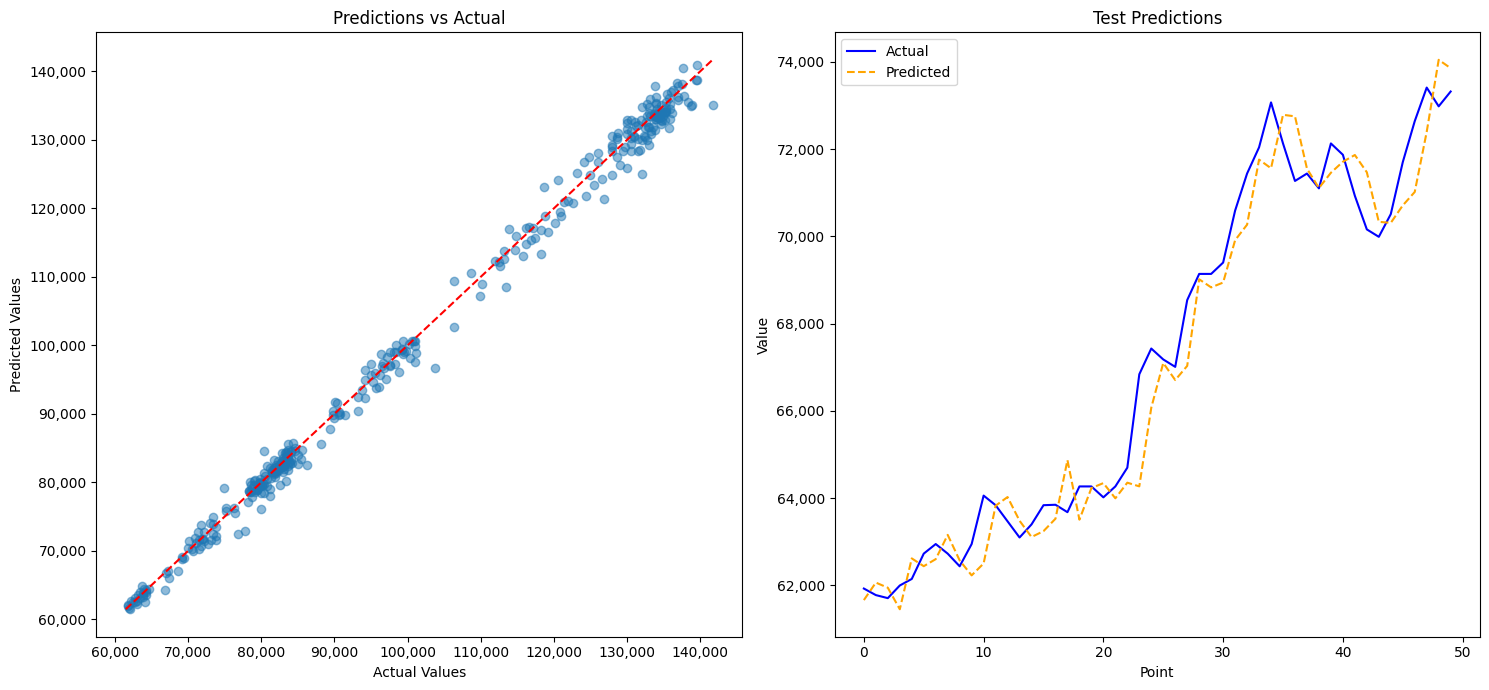

In [16]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter 

class StockPredictionModel:
    def __init__(self, file_path):
        """
        Initialize the class with the file path of the dataset.
        """
        self.file_path = file_path
        self.data = None
        self.model = None

    def load_and_preprocess_data(self):
        """
        Load the dataset and preprocess the data.
        """
        # Load data
        self.data = pd.read_csv(self.file_path)
        self.data["close_tomor"] = self.data["close"].shift(-1)
        self.data = self.data.iloc[:-1]  # # data = data.drop(data.index[-1]) # Xóa hàng cuối
        self.data.drop("close", axis=1, inplace=True)  # axis=1 xóa cột, =0 xóa hàng, inplace thay đổi trực tiếp trên df hiện tại

        # Define features and target
        X = self.data.drop(["close_tomor", "time"], axis=1)
        y = self.data["close_tomor"]

        # Split data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.25, random_state=42, shuffle=False
        )  # shuffle=False để ko đảo data => đúng với tính chất Time Series Dataset

        return X_train, X_test, y_train, y_test

    def train_model(self, X_train, y_train, alpha=0.5):
        """
        Train a Ridge regression model with the given training data.
        """
        self.model = Ridge(alpha=alpha, solver="lsqr")
        self.model.fit(X_train, y_train)
    def directional_accuracy(self, y_true, y_pred):
        """
        Calculate the Directional Accuracy (DA).
        """
        return np.mean((np.sign(y_true[1:].values - y_true[:-1].values) ==
                        np.sign(y_pred[1:] - y_pred[:-1])))
    def evaluate_model(self, y_train, y_pred_train, y_test, y_pred_test):
        """
        Evaluate the model performance using various metrics.
        """
        print("EVALUATE METRICS ON THE TRAIN SET")
        print("R2:", r2_score(y_train, y_pred_train))
        print("MSE:", mean_squared_error(y_train, y_pred_train))
        print("RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_train)))
        print("MAE:", mean_absolute_error(y_train, y_pred_train))
        print("MAPE%:", f"{mean_absolute_percentage_error(y_train, y_pred_train) * 100:.2f}%")
        DA_train = self.directional_accuracy(y_train, y_pred_train)
        print(f"Directional Accuracy (DA) on Train Set: {DA_train * 100:.2f}%\n")
        
        print("EVALUATE METRICS ON THE TEST SET")
        print("R2:", r2_score(y_test, y_pred_test))
        print("MSE:", mean_squared_error(y_test, y_pred_test))
        print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))
        print("MAE:", mean_absolute_error(y_test, y_pred_test))
        print("MAPE%:", f"{mean_absolute_percentage_error(y_test, y_pred_test) * 100:.2f}%")
        DA_test = self.directional_accuracy(y_test, y_pred_test)
        print(f"Directional Accuracy (DA) on Test Set: {DA_test * 100:.2f}%")

    # def plot_model(self, y_test, y_pred_test, num_samples=50):
    #     """
    #     Plot predictions vs actual values.
    #     Cải tiến so với code cũ là: num_samples=50 giúp nhận biết rõ hơn sự khác biệt
    #     """
    #     plt.subplots(figsize=(15, 7))
    #     ax1 = plt.subplot(121)
    #     ax2 = plt.subplot(122)

    #     # # Scatter plot
    #     # ax1.scatter(y_test, y_pred_test)
    #     # ax1.set_title("Predictions vs Actual")
    #     # ax1.set_xlabel("y_true")
    #     # ax1.set_ylabel("y_pred_test")
    #     # ax1.plot(range(int(max(y_test))), "r")
        
    #     # Scatter plot - chỉnh sửa phần này
    #     ax1.scatter(y_test, y_pred_test)
    #     ax1.set_title("Predictions vs Actual")
    #     ax1.set_xlabel("Actual Values")
    #     ax1.set_ylabel("Predicted Values")
        
    #     # Thêm đường y=x
    #     min_val = min(min(y_test), min(y_pred_test))
    #     max_val = max(max(y_test), max(y_pred_test))
    #     ax1.plot([min_val, max_val], [min_val, max_val], 'r--')

    #     # Định dạng trục số nguyên
    #     ax1.get_xaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
    #     ax1.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))


    #     # Line plot
    #     test_pred_subset_df = pd.DataFrame({
    #         "y_test": y_test[:num_samples],
    #         "y_pred_test": y_pred_test[:num_samples]
    #     }).reset_index(drop=True)

    #     sns.lineplot(data=test_pred_subset_df, ax=ax2)
    #     ax2.set_title("Test Predictions")
    #     ax2.set_xlabel("Point")
    #     ax2.set_ylabel("Value")
    #     ax2.legend(["Actual", "Predicted"])
    #     plt.show()
    

    def plot_model(self, y_test, y_pred_test, num_samples=50):
        """
        Plot predictions vs actual values. 
        Thay thế Seaborn bằng matplotlib thuần túy cho biểu đồ đường. Để không bị vấn đề:  Seaborn đang tự động thêm thang đo thứ hai từ 0-1
        """
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

        # Scatter plot
        ax1.scatter(y_test, y_pred_test, alpha=0.5)
        ax1.set_title("Predictions vs Actual")
        ax1.set_xlabel("Actual Values")
        ax1.set_ylabel("Predicted Values")
        
        # Thêm đường y=x
        min_val = min(min(y_test), min(y_pred_test))
        max_val = max(max(y_test), max(y_pred_test))
        ax1.plot([min_val, max_val], [min_val, max_val], 'r--')
        
        # Định dạng trục số nguyên
        ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
        ax1.xaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
        
        # Line plot - sử dụng matplotlib thay vì seaborn
        x_points = range(num_samples)
        ax2.plot(x_points, y_test[:num_samples], 'b-', label='Actual')
        ax2.plot(x_points, y_pred_test[:num_samples], 'orange', linestyle='--', label='Predicted')
        
        ax2.set_title("Test Predictions")
        ax2.set_xlabel("Point")
        ax2.set_ylabel("Value")
        ax2.legend()
        
        # Định dạng trục số cho biểu đồ thứ hai
        ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
        
        plt.tight_layout()
        plt.show()

    def process(self):
        """
        Execute the full pipeline: load, preprocess, train, evaluate, and plot.
        """
        X_train, X_test, y_train, y_test = self.load_and_preprocess_data()
        self.train_model(X_train, y_train)
        y_pred_train = self.model.predict(X_train)
        y_pred_test = self.model.predict(X_test)
        self.evaluate_model(y_train, y_pred_train, y_test, y_pred_test)
        self.plot_model(y_test, y_pred_test)

# Example usage for one file
file_path = "D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/data/raw20192024/FPT_stock_data.csv"
model = StockPredictionModel(file_path)
model.process()


## Chạy 1 loạt file 

Processing file: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/data/raw20192024/CMG_stock_data.csv

EVALUATE METRICS ON THE TRAIN SET
R2: 0.9928000011955956
MSE: 464379.7819237133
RMSE: 681.4541671482488
MAE: 461.7609744913662
MAPE%: 1.96%
Directional Accuracy (DA) on Train Set: 45.57%

EVALUATE METRICS ON THE TEST SET
R2: 0.9690924428959313
MSE: 2786993.8501803926
RMSE: 1669.4291989121289
MAE: 1083.755934912648
MAPE%: 2.14%
Directional Accuracy (DA) on Test Set: 45.65%


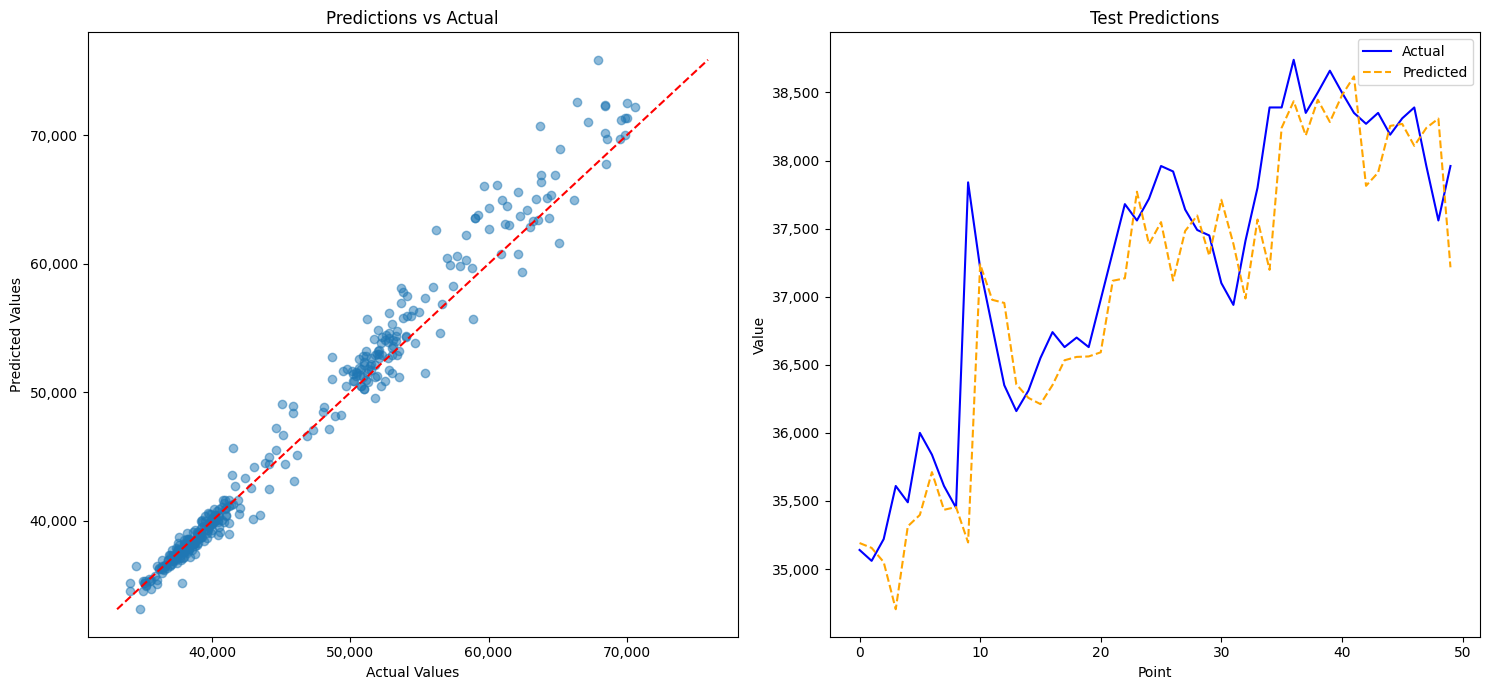

Processing file: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/data/raw20192024/CMT_stock_data.csv

EVALUATE METRICS ON THE TRAIN SET
R2: 0.9881170956537516
MSE: 422236.79996050085
RMSE: 649.7975068900317
MAE: 390.63871928648484
MAPE%: 3.11%
Directional Accuracy (DA) on Train Set: 34.57%

EVALUATE METRICS ON THE TEST SET
R2: 0.9639176103054443
MSE: 638622.2816807565
RMSE: 799.1384621458014
MAE: 485.00126076352075
MAPE%: 2.86%
Directional Accuracy (DA) on Test Set: 44.14%


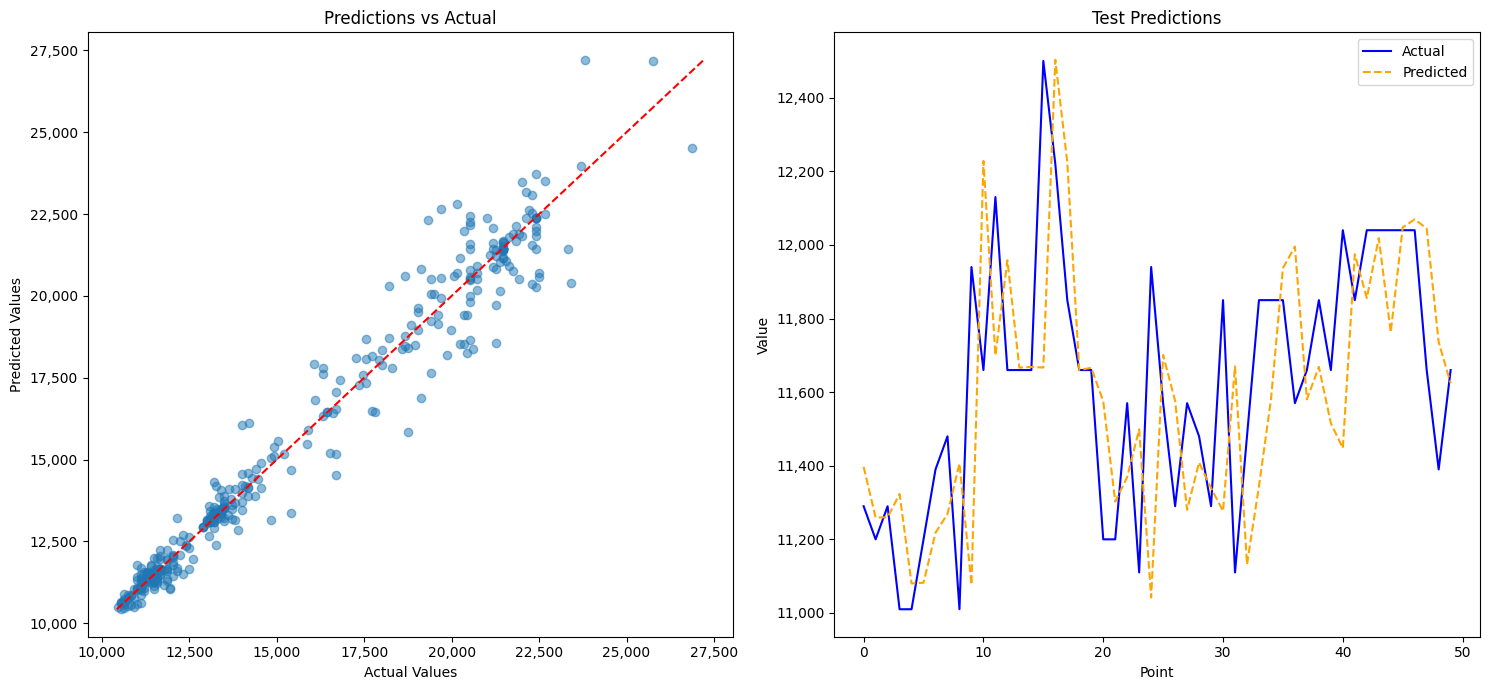

Processing file: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/data/raw20192024/DGW_stock_data.csv

EVALUATE METRICS ON THE TRAIN SET
R2: 0.995945653314104
MSE: 1345075.1958544697
RMSE: 1159.7737692560863
MAE: 678.252112349697
MAPE%: 2.78%
Directional Accuracy (DA) on Train Set: 47.29%

EVALUATE METRICS ON THE TEST SET
R2: 0.9441732772243561
MSE: 1228126.1444356807
RMSE: 1108.2085293101118
MAE: 819.4581768299626
MAPE%: 1.93%
Directional Accuracy (DA) on Test Set: 41.30%


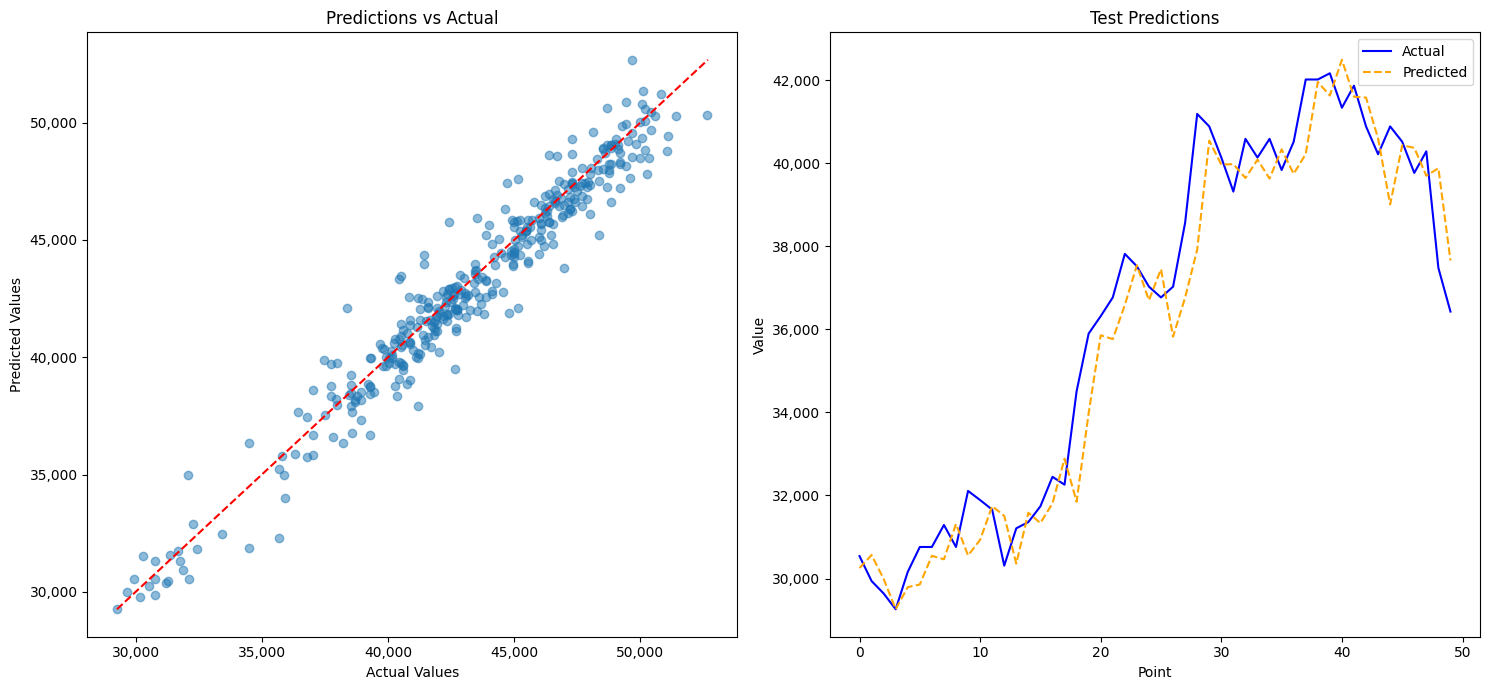

Processing file: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/data/raw20192024/ELC_stock_data.csv

EVALUATE METRICS ON THE TRAIN SET
R2: 0.9949809127269977
MSE: 90359.98438435644
RMSE: 300.59937522283116
MAE: 190.15476389145581
MAPE%: 2.49%
Directional Accuracy (DA) on Train Set: 45.93%

EVALUATE METRICS ON THE TEST SET
R2: 0.9866920121922503
MSE: 330674.2964662736
RMSE: 575.0428648946734
MAE: 428.66876919588583
MAPE%: 2.09%
Directional Accuracy (DA) on Test Set: 48.10%


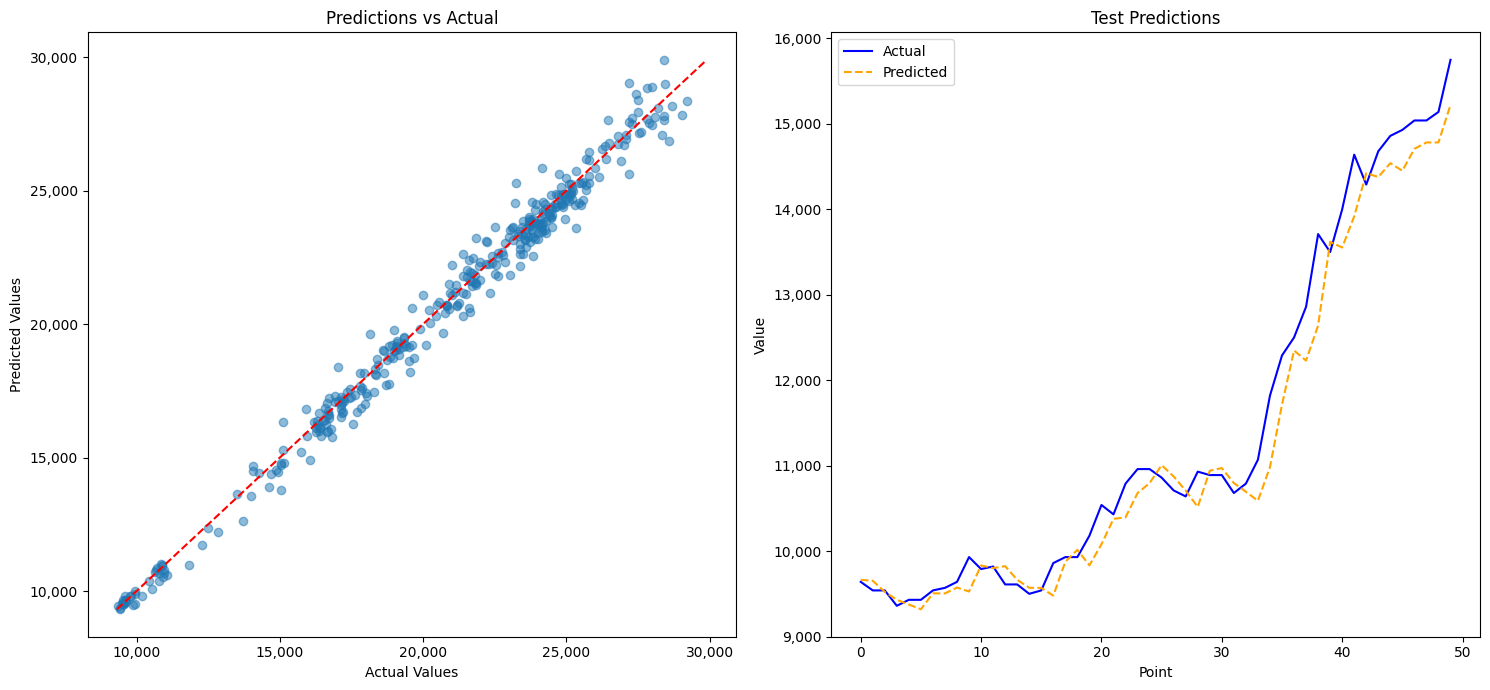

Processing file: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/data/raw20192024/FPT_stock_data.csv

EVALUATE METRICS ON THE TRAIN SET
R2: 0.9977797155743999
MSE: 674476.5654363135
RMSE: 821.2652223467845
MAE: 518.185109464765
MAPE%: 1.28%
Directional Accuracy (DA) on Train Set: 43.85%

EVALUATE METRICS ON THE TEST SET
R2: 0.995302257226857
MSE: 2987784.490706912
RMSE: 1728.5208968094403
MAE: 1267.4393457168815
MAPE%: 1.24%
Directional Accuracy (DA) on Test Set: 53.53%


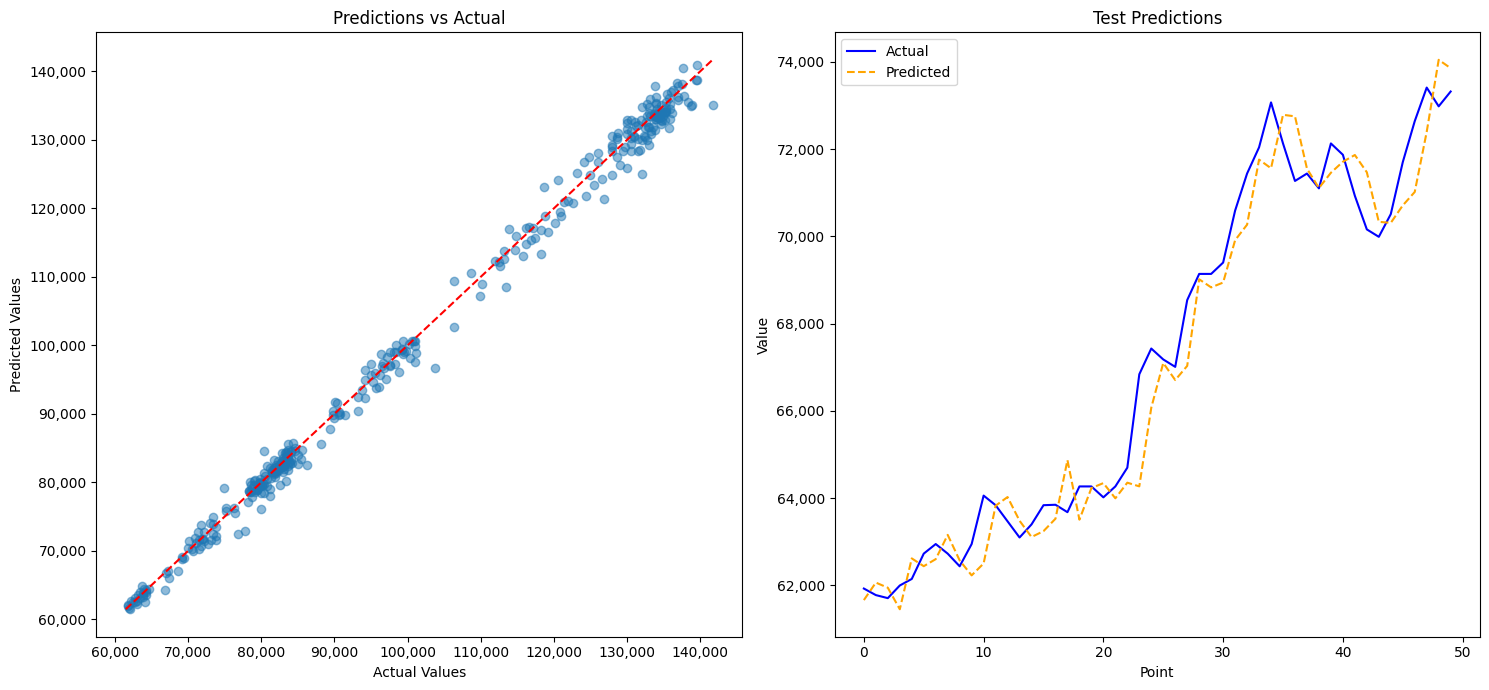

Processing file: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/data/raw20192024/SAM_stock_data.csv

EVALUATE METRICS ON THE TRAIN SET
R2: 0.9866389380233619
MSE: 218338.4351143009
RMSE: 467.2669848323343
MAE: 263.45357619649366
MAPE%: 2.31%
Directional Accuracy (DA) on Train Set: 39.15%

EVALUATE METRICS ON THE TEST SET
R2: 0.8828650544984162
MSE: 27770.92179192182
RMSE: 166.64609743981953
MAE: 117.26585133360815
MAPE%: 1.71%
Directional Accuracy (DA) on Test Set: 45.65%


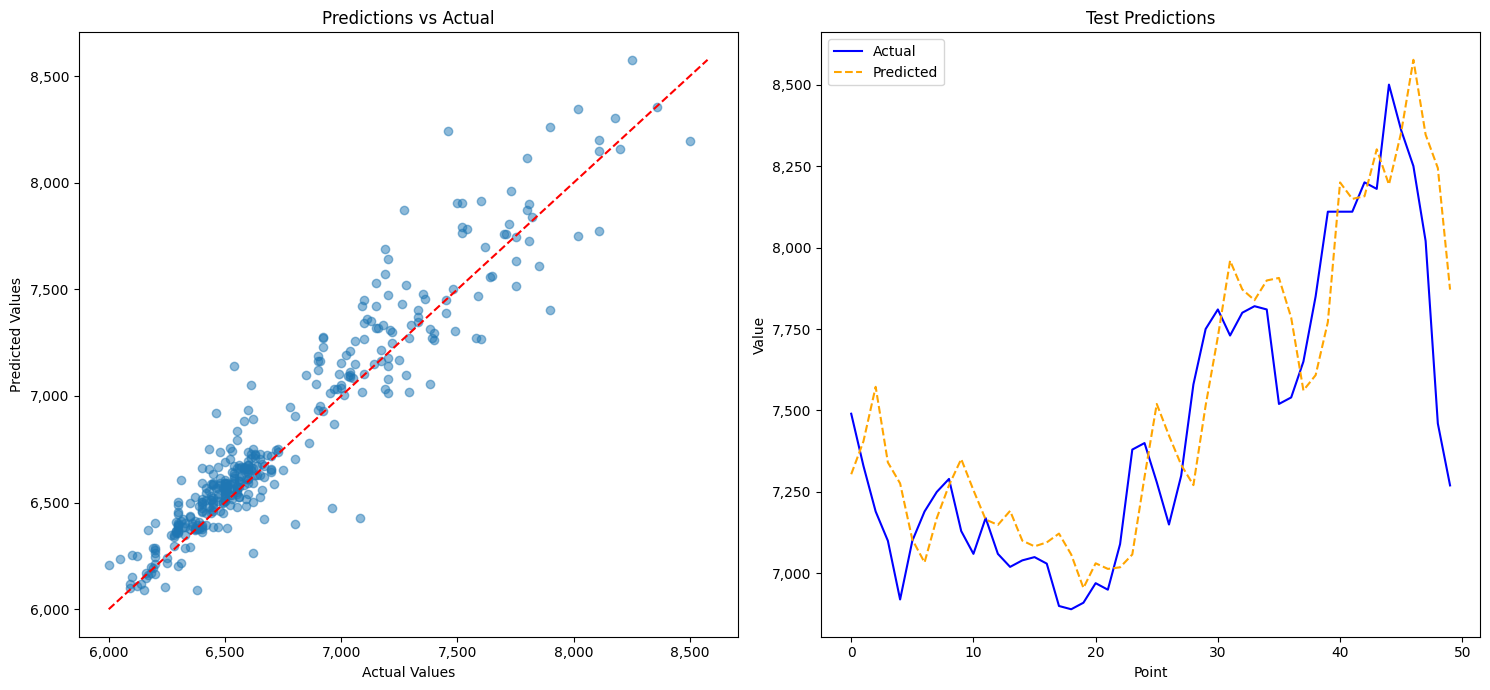

Processing file: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/data/raw20192024/VGC_stock_data.csv

EVALUATE METRICS ON THE TRAIN SET
R2: 0.9917260981867585
MSE: 1356384.3729599481
RMSE: 1164.6391599804415
MAE: 731.6825814686631
MAPE%: 2.33%
Directional Accuracy (DA) on Train Set: 42.91%

EVALUATE METRICS ON THE TEST SET
R2: 0.9445834486579802
MSE: 1411231.735730328
RMSE: 1187.9527497886133
MAE: 890.7153784429307
MAPE%: 1.88%
Directional Accuracy (DA) on Test Set: 44.69%


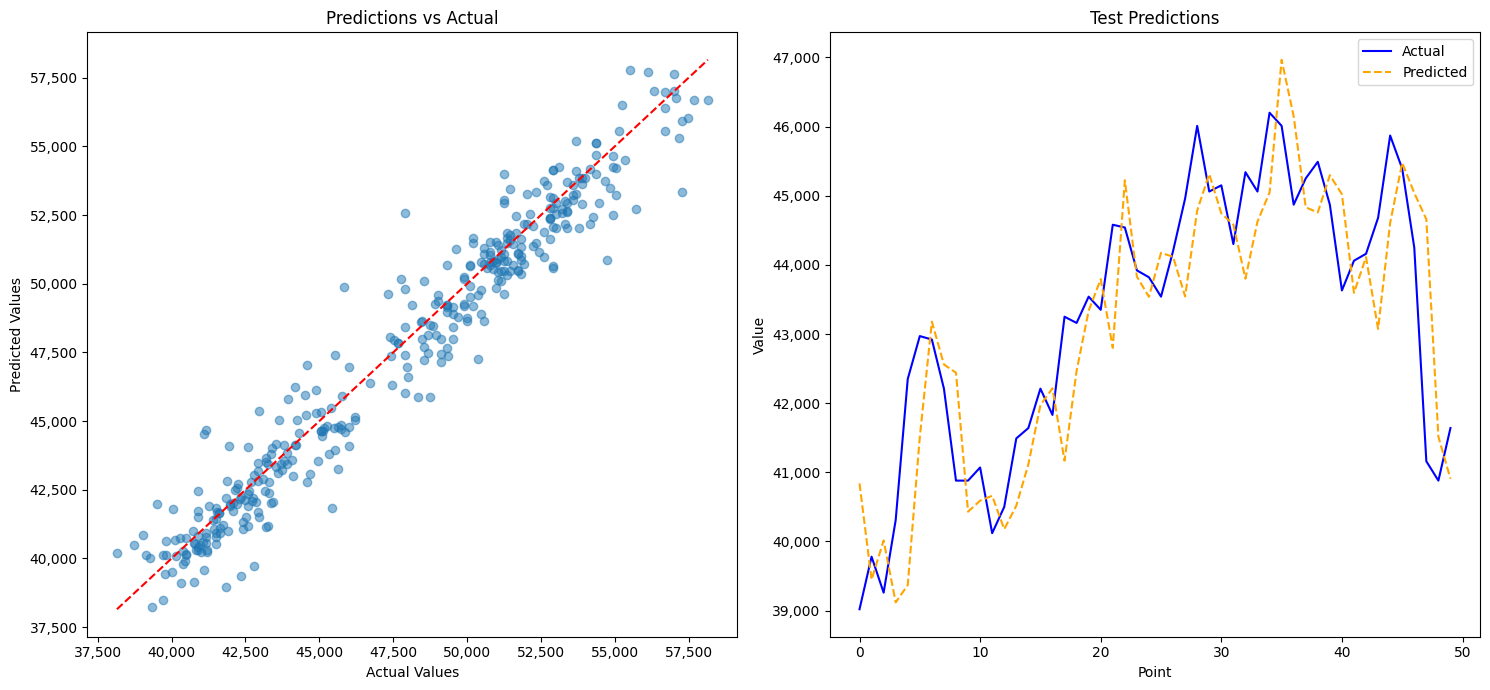

Processing file: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/data/raw20192024/VGI_stock_data.csv

EVALUATE METRICS ON THE TRAIN SET
R2: 0.9722794518992778
MSE: 1001560.5469023862
RMSE: 1000.779969275158
MAE: 705.313133137018
MAPE%: 2.49%
Directional Accuracy (DA) on Train Set: 43.04%

EVALUATE METRICS ON THE TEST SET
R2: 0.9917689909920906
MSE: 5966248.264305489
RMSE: 2442.5904823169785
MAE: 1501.4602580079572
MAPE%: 2.70%
Directional Accuracy (DA) on Test Set: 49.46%


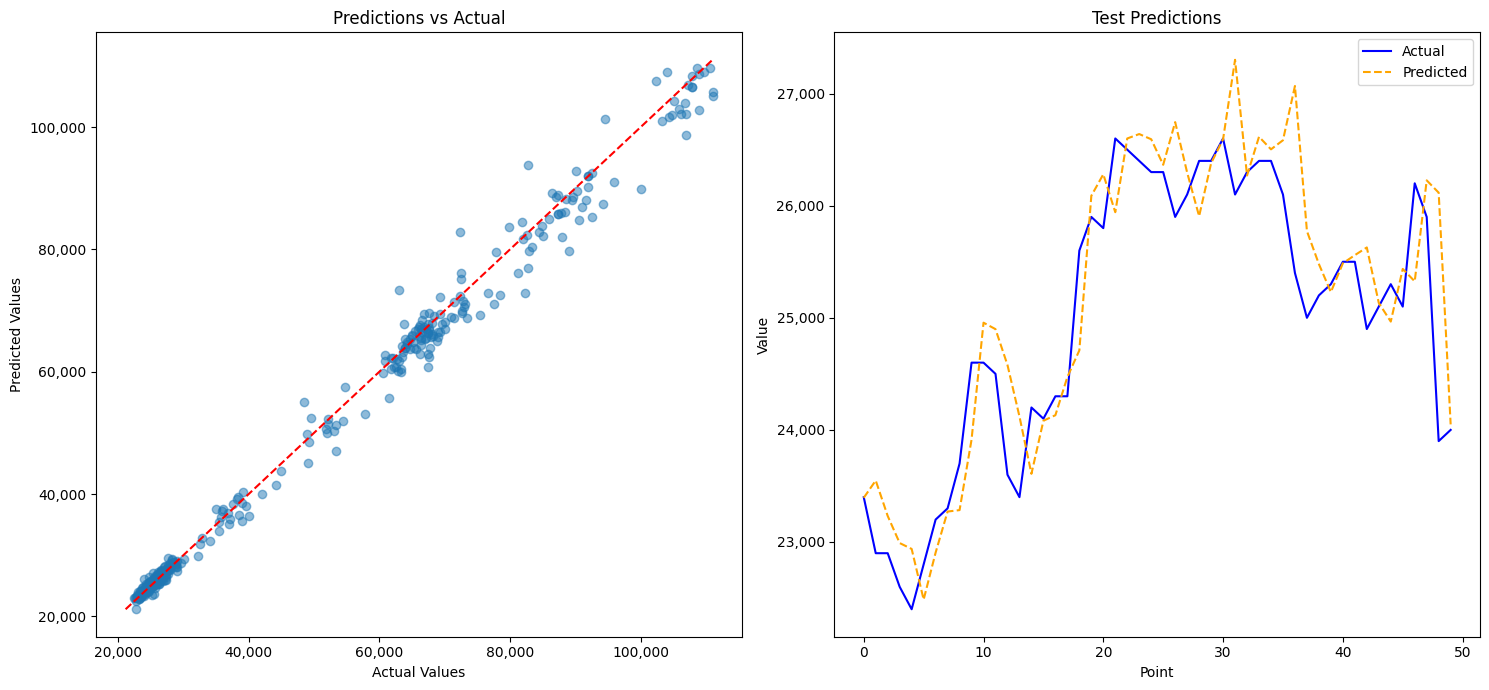

Processing file: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/data/raw20192024/VTL_stock_data.csv

EVALUATE METRICS ON THE TRAIN SET
R2: 0.9904772272461486
MSE: 358735.8510197254
RMSE: 598.9456160785596
MAE: 252.55069643502978
MAPE%: 1.54%
Directional Accuracy (DA) on Train Set: 65.87%

EVALUATE METRICS ON THE TEST SET
R2: 0.9756024564003695
MSE: 327324.7552955342
RMSE: 572.1230246158026
MAE: 218.71866348360484
MAPE%: 2.94%
Directional Accuracy (DA) on Test Set: 71.23%


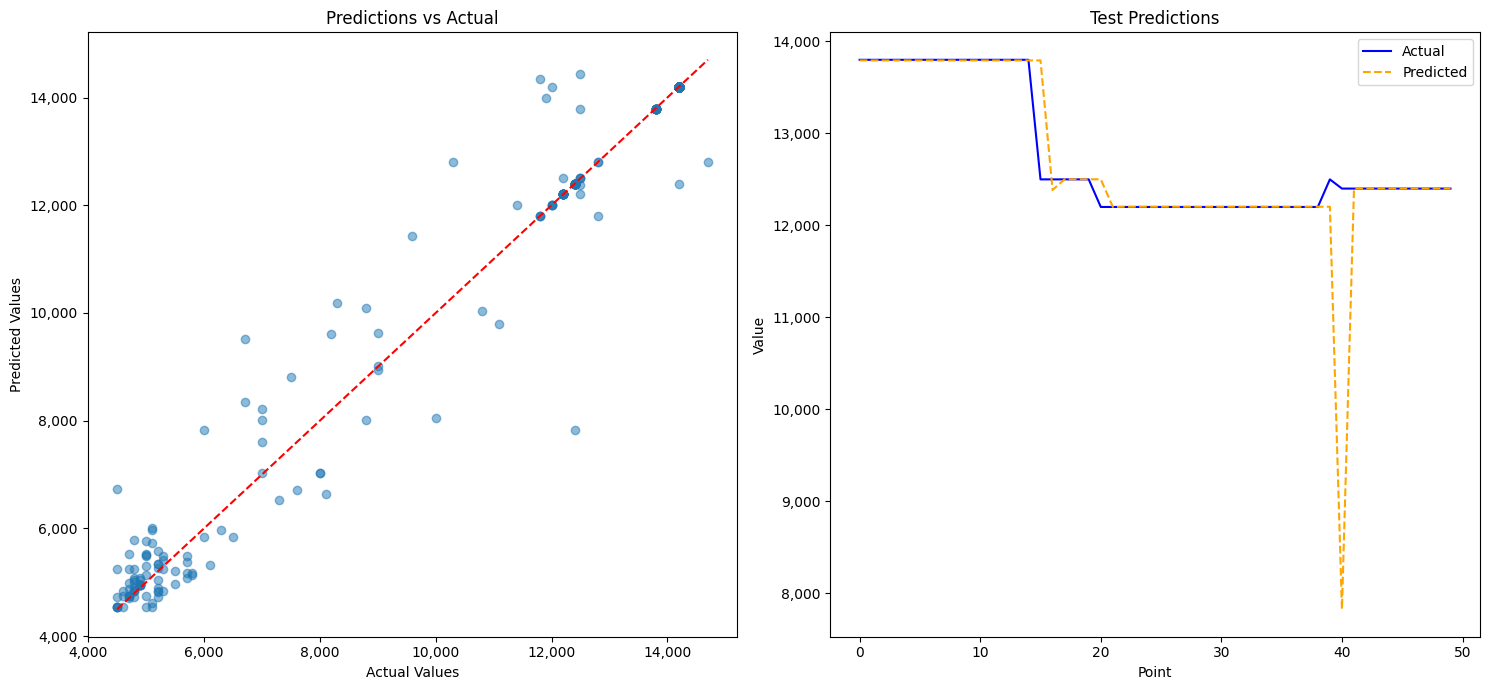

Processing file: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/data/raw20192024/VTP_stock_data.csv

EVALUATE METRICS ON THE TRAIN SET
R2: 0.9898419944438379
MSE: 1625314.534315581
RMSE: 1274.878242937568
MAE: 837.5248805832673
MAPE%: 1.70%
Directional Accuracy (DA) on Train Set: 47.27%

EVALUATE METRICS ON THE TEST SET
R2: 0.9892741942403781
MSE: 4859864.956159023
RMSE: 2204.5101397269696
MAE: 1456.2880365651902
MAPE%: 2.12%
Directional Accuracy (DA) on Test Set: 44.41%


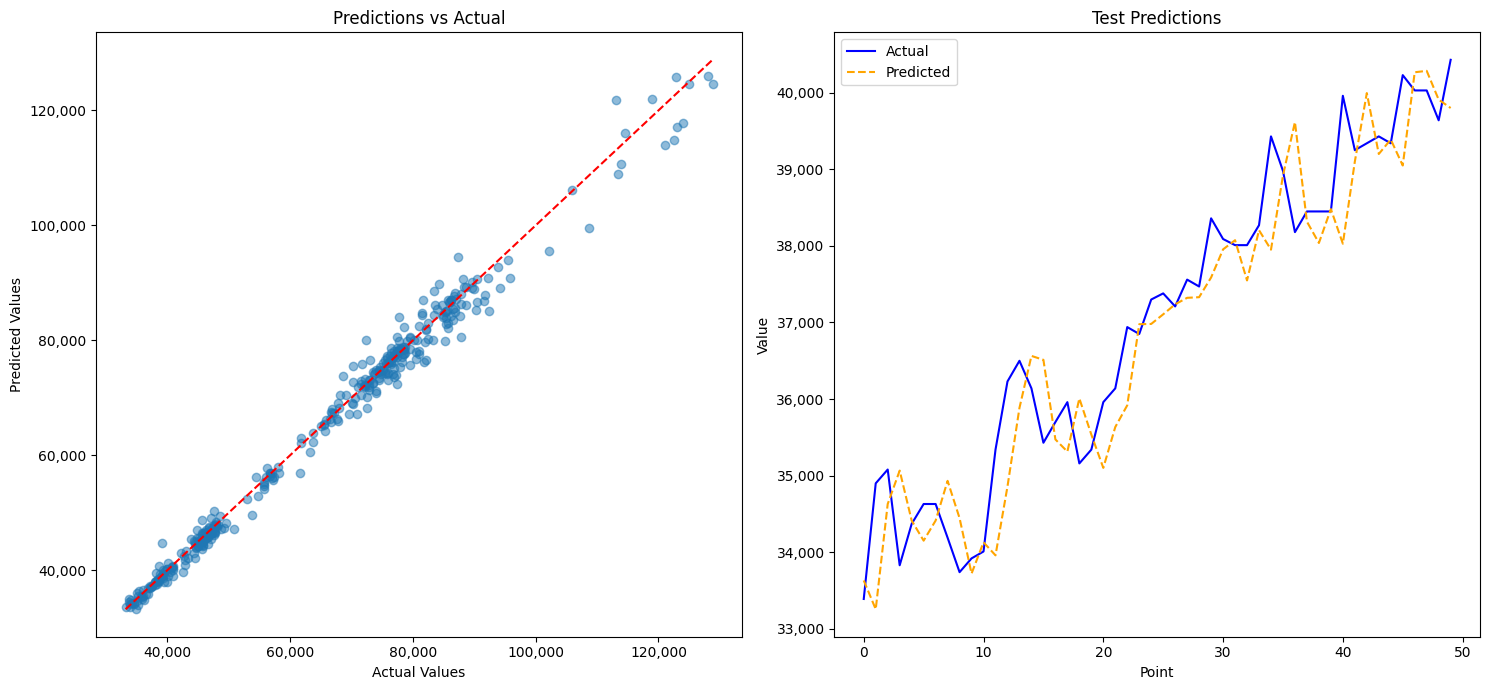

In [17]:
import os

# Đường dẫn tới thư mục chứa các file CSV
folder_path = "D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/data/raw20192024/"

# Lấy danh sách tất cả các file CSV trong thư mục
file_paths = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith(".csv")]

# Chạy model process cho từng file
for file_path in file_paths:
    print(f"Processing file: {file_path}")
    print()
    model = StockPredictionModel(file_path)
    model.process()
    print("="*50)  # Ngăn cách giữa các file
